In [1]:
# The igraph library
from igraph import *

# Numpy for enhanced math array management
import numpy as np

#Usata per calcolare il logaritmo
from math import log

# statistical tools (we only use ECDF)
from statsmodels.distributions.empirical_distribution import ECDF

# Mathematical plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# use to control whether to show the entire cell output or only the last_expr (default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to generate random numbers
from random import *
import sys
# to fit power law distributions
from powerlaw import *

In [9]:
fg = read("dataset/socfb-wosn-friends.cut.sb.10K.edges", format = "ncol", directed = False)
summary(fg, verbosity=1, max_rows = 25, edge_list_format = 'edgelist')

visual_style = {}

visual_style["bbox"] = (600,600)
visual_style["label"] = []
visual_style["layout"] = fg.layout_fruchterman_reingold()
visual_style["vertex_size"] = 5
visual_style["vertex_color"] = 'yellow'
visual_style["vertex_shape"] = 'circle'
visual_style["edge_arrow_size"] = 0.01
# Plot the graph
out = plot(fg, **visual_style)
out.save("fg.png")

conn = fg.is_connected()
print("Is connected? {}".format(conn))
cluster = fg.clusters(mode="weak")
print("Num of connected components: {}".format(len(cluster)))
print("Size of connected components: {}".format(cluster.sizes()))
# Giant component
gc = cluster.giant()
summary(gc, verbosity=1, max_rows = 25, edge_list_format = 'edgelist')
    

visual_style = {}

visual_style["bbox"] = (600,600)
visual_style["label"] = []
visual_style["layout"] = gc.layout_fruchterman_reingold()
visual_style["vertex_size"] = 5
visual_style["vertex_color"] = 'red'
visual_style["vertex_shape"] = 'circle'
visual_style["edge_arrow_size"] = 0.2
#visual_style["edge_width"] = np.array(gc.es["weight"])/10

out = plot(gc, **visual_style)
out.save('gc.png')


IGRAPH UN-- 10000 229693 -- 
+ attr: name (v)
+ edges (vertex names):
        edge  
[0]    5--22  
[1]    5--683 
[2]    5--821 
[3]    5--469 
[4]    5--639 
[5]    5--814 
[6]    5--1528
[7]    5--1640
[8]    5--1642
[9]    5--1643
[10]   5--1648
[11]   5--2548
[12]   5--4246
[13]   5--4503
[14]   5--4964
[15]   9--23  
[16]   9--2058
[17]   9--309 
[18]   9--2175
[19]   469--9 
[20]   639--9 
[21]   1528--9
[22]   1640--9
[23]   9--47  
[24]   9--100 
Is connected? True
Num of connected components: 1
Size of connected components: [10000]
IGRAPH UN-- 10000 229693 -- 
+ attr: name (v)
+ edges (vertex names):
        edge  
[0]    5--22  
[1]    5--683 
[2]    5--821 
[3]    5--469 
[4]    5--639 
[5]    5--814 
[6]    5--1528
[7]    5--1640
[8]    5--1642
[9]    5--1643
[10]   5--1648
[11]   5--2548
[12]   5--4246
[13]   5--4503
[14]   5--4964
[15]   9--23  
[16]   9--2058
[17]   9--309 
[18]   9--2175
[19]   469--9 
[20]   639--9 
[21]   1528--9
[22]   1640--9
[23]   9--47  
[24]   

In [13]:
# degree distribution
plt.figure(1)
fb_deg = gc.degree(mode='all') # con all calcola il grado del grafo non direzionale, resstituisce un array di gradi per ogni nodo
print("Max degree: {}".format(max(fb_deg)))
id_max = np.argmax(fb_deg)
print("Max degree node: {}".format(id_max))
nei = gc.neighborhood(id_max, order=1, mode='all')
print("Neighborhood len: {}".format(len(nei)))
nei_2 = gc.neighbors(id_max)
print("Neighbors len: {}".format(len(nei_2)))
print(gc.neighborhood_size(id_max, order=1, mode='all'))

<Figure size 432x288 with 0 Axes>

Max degree: 1098
Max degree node: 492
Neighborhood len: 1099
Neighbors len: 1098
1099


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, '$d$')

Text(0, 0.5, '$P(D>d)$')

Text(0.5, 1.0, 'Degree CCDF in a lin-lin scale')

Text(0.5, 0, '$d$')

Text(0, 0.5, '$P(D>d)$')

Text(0.5, 1.0, 'Degree CCDF in a log-log scale')

<Figure size 432x288 with 0 Axes>

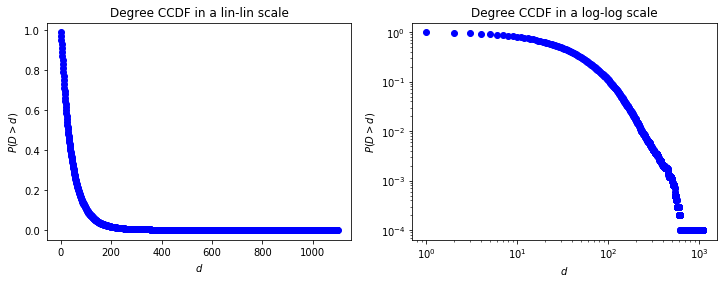

In [14]:
# CCDF
deg_cdf = ECDF(fb_deg) # generatiìore di funzioni, restituisce una funzione interpolante per la CDF
default_sizes = plt.rcParams["figure.figsize"]
fig_sizes = (2*default_sizes[0], default_sizes[1])
    
#plotting CCDF
plt.figure(3)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = fig_sizes)
degs = np.arange(1,max(fb_deg)+1) # tutti i gradi della mia rete
ax1.plot(degs, 1-deg_cdf(degs), 'bo')
ax1.set_xlabel("$d$")
ax1.set_ylabel("$P(D>d)$")
ax1.set_title("Degree CCDF in a lin-lin scale")

ax2.loglog(degs, 1-deg_cdf(degs), 'bo')
ax2.set_xlabel("$d$")
ax2.set_ylabel("$P(D>d)$")
ax2.set_title("Degree CCDF in a log-log scale")
plt.savefig("CCDF.png")

In [15]:
# FITTING DELLA CCDF ############################################
# genero una rete con lo stesso numero di nodi e archi ma secondo il modello del ranndom graph (Erdos Renyi)
er_p = mean(gc.degree()) / gc.vcount()
er_graph = Graph.Erdos_Renyi(gc.vcount(), er_p)

# Erdos Renyi giant component
er_gc = er_graph.clusters(mode = "WEAK").giant()
print("Erdos Renyi GC node count: {}".format(er_gc.vcount()))
print("Original GC node count: {}".format(gc.vcount()))



Erdos Renyi GC node count: 10000
Original GC node count: 10000


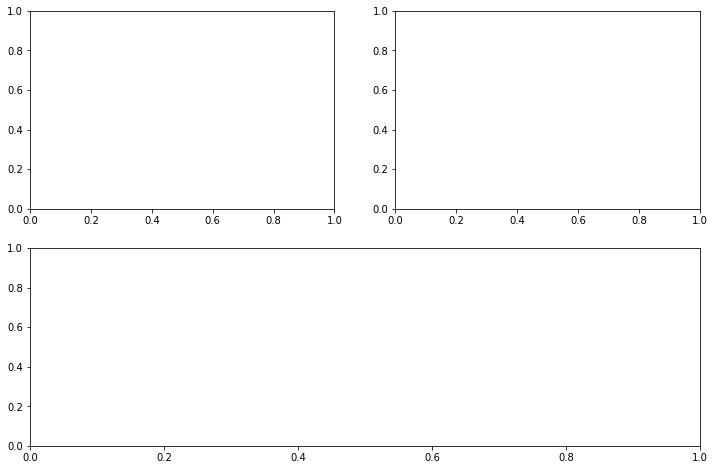

In [16]:
# plotting
# we use GridSpecs for a finer control of the plot positioning
fig_sizes = (fig_sizes[0], 2*default_sizes[1])
f = plt.figure(figsize = fig_sizes)

# create a 2x2 Grid Specification
gs = gridspec.GridSpec(2, 2)

# add subplots to the figure, using the GridSpec gs
# position [0,0] (upper-left corner)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
# the third plot spans the entire second row
ax3 = plt.subplot(gs[1,:])



In [22]:
# compute and plot the histogram of FB degrees
deg_gc = gc.degree()    # gradi del giant componet
_,_,_ = ax1.hist(deg_gc, bins=range(1,max(deg_gc)+2), density = True, color = 'red')
_ = ax1.set_xlim(0,80)
_ = ax1.set_xlabel("$d$")
_ = ax1.set_ylabel("Frequencies")
_ = ax1.set_title("Histogram of FB degrees")



In [23]:
# compute and plot the histogram of ER degrees
deg_er = er_gc.degree()
_,_,_ = ax2.hist(deg_er, bins=range(1,max(deg_er)+2), density = True, color = 'blue')
_ = ax2.set_xlim(0,80)
_ = ax2.set_xlabel("$d$")
_ = ax2.set_ylabel("Frequencies")
_ = ax2.set_title("Histogram of ER degrees")



In [24]:
# compute and plot the degree CCDFs
fb_ecdf = ECDF(deg_gc)
er_ecdf = ECDF(deg_er)
x = np.arange(1,max(deg_gc)+1)
_ = ax3.loglog(x, 1-fb_ecdf(x), 'ro', label = 'Facebook')
x = np.arange(1,max(deg_er)+1)
_ = ax3.loglog(x, 1-er_ecdf(x), 'bo', label = 'Erdos-Renyi')
_ = ax3.set_xlabel("$d$")
_ = ax3.set_ylabel("$P(D>d)$")
_ = ax3.set_title("Comparison between degree CCDFs")
_ = ax3.legend(numpoints = 1)
plt.savefig("er_plot.png")
plt.close()

Calculating best minimal value for power law fit
/home/osboxes/.local/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


PL exponents: (xmin=40) 2.53; (auto xmin=169.00) 4.25


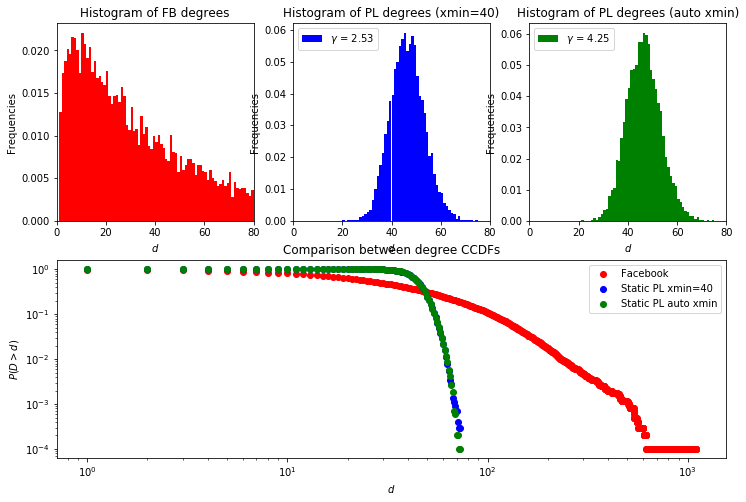

In [27]:
 #############################################################
# fitting with power law
    

# fitting della power law
xmin = 40 #può essere impostato e passato alla funzione fit
fit_pl_auto = Fit(gc.degree()) # restituisce un oggetto con il campo alpha (esponente pl che meglio fitta i miei dati) 
                                                # e xmin (valore minimo del grado per cui il fitting è valido)
fit_pl = Fit(gc.degree(), xmin=xmin)

xmin_auto = fit_pl_auto.xmin
exp_pl_auto = fit_pl_auto.alpha
exp_pl = fit_pl.alpha
print ("PL exponents: (xmin=%d) %.2f; (auto xmin=%.2f) %.2f" % (xmin, exp_pl, xmin_auto, exp_pl_auto))

# genero due reti PL equivalenti con alpha e xmin trovati
N = gc.vcount()
M = gc.ecount()
pl_graph_auto = Graph.Static_Power_Law(N, int(round(M)), xmin_auto)
pl_graph_auto_gc = pl_graph_auto.clusters(mode='weak').giant()

pl_graph = Graph.Static_Power_Law(N, int(round(M)), xmin)
pl_graph_gc = pl_graph.clusters(mode='weak').giant()


# plotting
fig_sizes = (fig_sizes[0], 2*default_sizes[1])
f = plt.figure(figsize = fig_sizes)

# create a 2x3 Grid Specification
gs = gridspec.GridSpec(2, 3)

# add subplots to the figure, using the GridSpec gs
# position [0,0] (upper-left corner)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[0,2])
# the fourth plot spans the entire second row
ax4 = plt.subplot(gs[1,:])

# compute and plot the histogram of FB degrees
d_fb = gc.degree()
_,_,_ = ax1.hist(d_fb, bins=range(1,max(d_fb)+2), density = True, color = 'red')
_ = ax1.set_xlim(0,80)
_ = ax1.set_xlabel("$d$")
_ = ax1.set_ylabel("Frequencies")
_ = ax1.set_title("Histogram of FB degrees")

# compute and plot the histogram of Static Power Law degrees with set xmin
d_pl = pl_graph_gc.degree()
_,_,_ = ax2.hist(d_pl, bins=range(1,max(d_pl)+2), density = True, color = 'blue', label = "$\gamma$ = %.2f" % exp_pl)
_ = ax2.set_xlim(0,80)
_ = ax2.set_xlabel("$d$")
_ = ax2.set_ylabel("Frequencies")
_ = ax2.set_title("Histogram of PL degrees (xmin=%d)" % xmin)
_ = ax2.legend()

# compute and plot the histogram of Static Power law degrees with auto xmin
d_pl_auto = pl_graph_auto_gc.degree()
_,_,_ = ax3.hist(d_pl_auto, bins=range(1,max(d_pl_auto)+2), density = True, color = 'green', label = "$\gamma$ = %.2f" % exp_pl_auto)
_ = ax3.set_xlim(0,80)
_ = ax3.set_xlabel("$d$")
_ = ax3.set_ylabel("Frequencies")
_ = ax3.set_title("Histogram of PL degrees (auto xmin)")
_ = ax3.legend()

# compute and plot the degree CCDFs
fb_ecdf = ECDF(d_fb)
pl_ecdf = ECDF(d_pl)
pl_auto_ecdf = ECDF(d_pl_auto)
x = np.arange(1,max(d_fb)+1)
_ = ax4.loglog(x, 1-fb_ecdf(x), 'ro', label = 'Facebook')
x = np.arange(1,max(d_pl)+1)
_ = ax4.loglog(x, 1-pl_ecdf(x), 'bo', label = 'Static PL xmin=%d' % xmin)
x = np.arange(1,max(d_pl_auto)+1)
_ = ax4.loglog(x, 1-pl_auto_ecdf(x), 'go', label = 'Static PL auto xmin')
_ = ax4.set_xlabel("$d$")
_ = ax4.set_ylabel("$P(D>d)$")
_ = ax4.set_title("Comparison between degree CCDFs")
_ = ax4.legend(numpoints = 1)


In [28]:
# for reference, plot the power law functions corresponding to the fitting with fixed and automatic xmin
x1 = np.arange(xmin_auto, max(d_fb)+1)
_ = ax4.loglog(x1, 1000000000000 * x1**(-exp_pl_auto), 'g-', linewidth = 3)
x1 = np.arange(xmin, max(d_fb)+1)
_ = ax4.loglog(x1, 1000 * x1**(-exp_pl), 'b-', linewidth = 2)
plt.savefig("PL compare.png")
plt.close()

In [29]:
# degree correlation
# assortativity
print("Assortativity")
# coefficiente di corerelazione
print("Correlation coefficient: {}".format(gc.assortativity_degree())) 
# restituisce l'indice di correlazione fra i gradi dei nodi vicini.
# se è positivo, assortativo, negativo disassortativo, se prossimo allo zero non si puo dire
 
fb_knn, fb_knnk = gc.knn() #restituisce due vettori
plt.figure(6)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = fig_sizes)
ax1.loglog(gc.degree(), fb_knn, 'go')
ax1.set_xlabel("degree")
ax1.set_ylabel("Neighbors degree")
ax1.set_title("$knn$ index for the FB Giant Component")

ax2.loglog(range(1,max(gc.degree())+1), fb_knnk, 'go')
ax2.set_xlabel("degree")
ax2.set_ylabel("Average degree of neighbors")
ax2.set_title("$knnk$ index for the FB Giant Component")
plt.savefig("assortatyvity.png")
plt.close()

Assortativity
Correlation coefficient: 0.0694862700376148


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'degree')

Text(0, 0.5, 'Neighbors degree')

Text(0.5, 1.0, '$knn$ index for the FB Giant Component')

Text(0.5, 0, 'degree')

Text(0, 0.5, 'Average degree of neighbors')

Text(0.5, 1.0, '$knnk$ index for the FB Giant Component')

<Figure size 432x288 with 0 Axes>

In [30]:
# CLUSTERING
# my graph
c1_idx = gc.transitivity_undirected() #C1
c2_idx = gc.transitivity_avglocal_undirected(mode="zero") # C2
c_random_idx = 1/gc.vcount()
# Erdos Renyi
c1_er_idx = er_gc.transitivity_undirected() #C1
c2_er_idx = er_gc.transitivity_avglocal_undirected(mode="zero") # C2
    

print("Clustering C1: {}".format(c1_idx))
print("Clustering C2: {}".format(c2_idx))
print("Theoretic Clustering Random Graph: {}".format(c_random_idx))
print("ER Clustering C1: {}".format(c1_er_idx))
print("ER Clustering C2: {}".format(c2_er_idx))

Clustering C1: 0.15963124513639235
Clustering C2: 0.2650973730927101
Theoretic Clustering Random Graph: 0.0001
ER Clustering C1: 0.004601800457164125
ER Clustering C2: 0.004584641759890113


In [31]:
# centrality
idx = np.argwhere(np.array(gc.degree())>60).flatten()
sub_g = gc.induced_subgraph(idx)
    
# closeness centrality
sub_g.closeness()[0:19]

# betweenness centrality
sub_g.betweenness()[0:19]

# edge betweenness, and edge with the maximum edge betweenness
edge_bet = sub_g.edge_betweenness()
idx_max = np.argmax(edge_bet)
idx_max
edge_bet[idx_max]
sub_g.es[idx_max].tuple


[0.45281975672687064,
 0.37300743889479276,
 0.5080645161290323,
 0.4229643656395249,
 0.4600262123197903,
 0.3854722309381864,
 0.4621026894865526,
 0.48091603053435117,
 0.44713375796178345,
 0.37788372808366655,
 0.44278248333032977,
 0.3585291113381001,
 0.4539072602992795,
 0.44803063457330417,
 0.49307645996387717,
 0.4787607170693687,
 0.39860480207657367,
 0.4164406779661017,
 0.4095]

[7114.526571554576,
 166.09260039975757,
 19692.701063811146,
 1593.7438087662363,
 13953.057832457154,
 99.0432103131069,
 10098.070814655803,
 18112.9964367263,
 1834.9154975698866,
 132.85475636206823,
 944.5158330332137,
 147.1878732176739,
 10917.37755560452,
 3436.1398260416095,
 28099.26811854999,
 16880.881838173907,
 5559.581109557735,
 1562.2563675436577,
 1147.6478647899116]

90936

3353.644526935173

(340, 2330)

In [32]:
# comunity detection
idxs = np.argwhere(np.array(gc.degree()) > 3).flatten()
subgraph = gc.induced_subgraph(idxs)
# Fastgreedy algorithm
vd = subgraph.community_fastgreedy()

# The number of detected communities
print("Number of detected communities: {}".format(vd.optimal_count))
# convert to a cluster object to access additional information
vd_clust = vd.as_clustering()

# the sizes of the communities
print("size of communities: {}".format(vd_clust.sizes()))

# plot the communities
out = plot(vd_clust, layout=gc.layout_fruchterman_reingold(), mark_groups = True)
out.save("comunities.png")
    
# identify the indices of edges that cut across different communities
cros = np.array(vd_clust.crossing())
np.argwhere(cros == True).flatten()

Number of detected communities: 11
size of communities: [4688, 3769, 29, 181, 723, 64, 41, 2, 2, 3, 9]


array([     6,     11,     16, ..., 228586, 228608, 228659])

<Figure size 432x288 with 0 Axes>

FB net shortest path: 3.055108000000033
ER net shortest path: 2.8032019999999


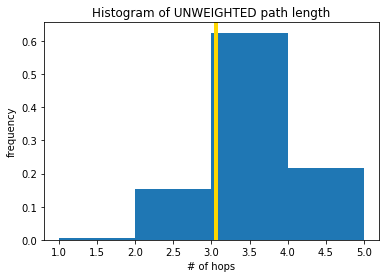

In [33]:
# shortest path
#quanti hop servono a collegare due nodi nella rete
# si calcola lo shortest path medio
# campionamento dei nodi
# grafo iniziale
src = sample(list(gc.vs), 1000)
trg = sample(list(gc.vs), 1000)
n_hops_u = gc.shortest_paths(source = src, target = trg, weights = None)
n_hops_u = np.array(n_hops_u).flatten()
plt.figure(6)
_,_,_ = plt.hist(n_hops_u, bins = range(1,max(n_hops_u)+2), density = True)
_ = plt.axvline(mean(n_hops_u), color = 'gold', linewidth = 4)
_ = plt.xlabel("# of hops")
_ = plt.ylabel("frequency")
_ = plt.title("Histogram of UNWEIGHTED path length")
plt.savefig("shortest_path.png")
# Erdos Renyi
er_src = sample(list(er_gc.vs), 1000)
er_trg = sample(list(er_gc.vs), 1000)
gc_sp_avg = mean(np.array(gc.shortest_paths(source = src, target = trg, weights = None)).flatten())
er_gc_sp_avg = mean(np.array(er_gc.shortest_paths(source = er_src, target = er_trg, weights = None)).flatten())
print("FB net shortest path: {}".format(gc_sp_avg))
print("ER net shortest path: {}".format(er_gc_sp_avg))